In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
from matplotlib import ticker

#set the default plot parameter
plt_param={'font.family':'serif',
           'font.serif':'Times New Roman',
           'lines.linewidth':1,
           'xtick.labelsize':12,
           'ytick.labelsize':12,
           'axes.labelsize':16,
           'xtick.direction':'in',
           'ytick.direction':'in',
           'font.style':'italic',
           'font.weight':'normal',
           'figure.figsize':[5,5],'xtick.minor.visible':True,
           'ytick.minor.visible':True,
           'xtick.major.size':4,
           'ytick.major.size':4,
           'xtick.minor.size':2,
           'ytick.minor.size':2,
           'xtick.major.width':.8,
           'ytick.major.width':.8,
           'xtick.top':True,
           'ytick.right':True,
           'axes.spines.bottom':True,
           'axes.spines.top':True,
           'axes.spines.left':True,
           'axes.spines.right':True,
           'xtick.bottom':True,
           'xtick.labelbottom':True,
           'ytick.left':True,
           'ytick.labelleft':True}
rcParams.update(plt_param)

In [2]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/analysis results/newresults/specmap/'
specmap_name='spec_ap.out'
specmap_model_name='spec_ap_model.out'
spectral_para_name='spec_para.out'
spectral_axis__model_name='spec_axis_model.out'
specnoise_name='spec_noise.out'
ramap_name='ra_ap.out'
decmap_name='dec_ap.out'
spectral_axis_name='spec_axis.out'
specmap=np.genfromtxt(dic+specmap_name,delimiter=',')
specmap_model=np.genfromtxt(dic+specmap_model_name,delimiter=',')
ramap=np.genfromtxt(dic+ramap_name,delimiter=',')
decmap=np.genfromtxt(dic+decmap_name,delimiter=',')
spectral_axis=np.genfromtxt(dic+spectral_axis_name,delimiter=',')
spectral_axis_model=np.genfromtxt(dic+spectral_axis__model_name,delimiter=',')
spectral_noise=np.genfromtxt(dic+specnoise_name,delimiter=',')
spectral_para=np.genfromtxt(dic+spectral_para_name,delimiter=',')

In [3]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/analysis results/newresults/ly/'
lyimg_name='lyimg.out'
lyx_name='lyx'
lyy_name='lyy'
lyimg=np.genfromtxt(dic+lyimg_name,delimiter=',')
lyx=np.genfromtxt(dic+lyx_name,delimiter=',')
lyy=np.genfromtxt(dic+lyy_name,delimiter=',')

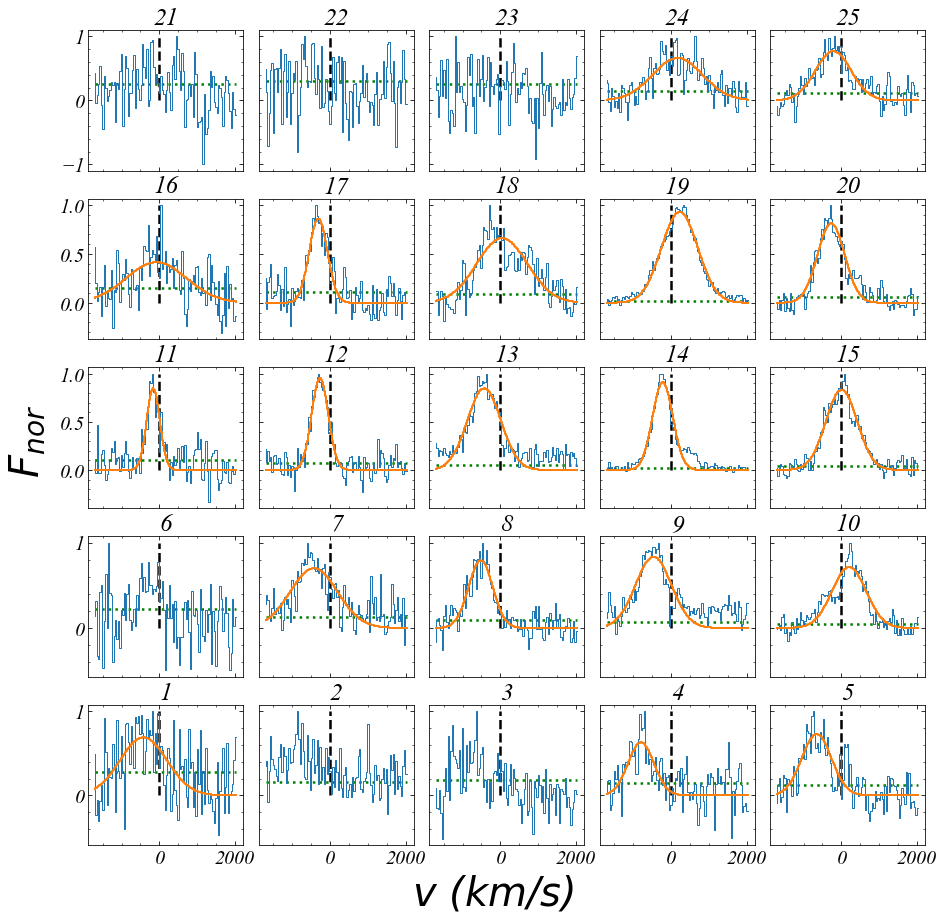

In [6]:
fig_dir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
fig,AX=plt.subplots(5,5,sharex=True,sharey='row',figsize=(15,15))
AX=AX.flatten()
for i in range(25):
    index=20-(i//5)*5+(i%5)
    AX[index].step(spectral_axis,specmap[i,:])
    signal_num=np.where(specmap[i]>spectral_noise[i])[0].shape[0]
    if signal_num>0.42*101 and spectral_para[i,1]<1000:
        AX[index].step(spectral_axis_model,specmap_model[i,:],lw=2)
        AX[index].set_title(str(i+1),fontsize=25)#+' '+str(spectral_para[i,2].astype(np.float16)))
    AX[index].set_title(str(i+1),fontsize=25)
    AX[index].hlines(spectral_noise[i],
                                 xmin=spectral_axis.min(),
                                 xmax=spectral_axis.max(),
                                 color='green',linestyles='dotted',lw=2.5)
    AX[index].vlines(0,ymin=0,ymax=1,color='black',linestyles='dashed',lw=2.5)
    AX[index].tick_params(axis='both', which='major', labelsize=20)
fig.text(0.5, 0.07, r'$\rm v \ (km/s)$', ha='center',fontsize=40.)
fig.text(0.05, 0.5, r'$\rm F_{nor}$', va='center', rotation='vertical',fontsize=40.)
plt.rcParams['figure.figsize'] = [5, 5]
plt.subplots_adjust(wspace=0.1,hspace=0.2)
# plt.savefig(fig_dir+'specmap.png',dpi=300)
plt.show()

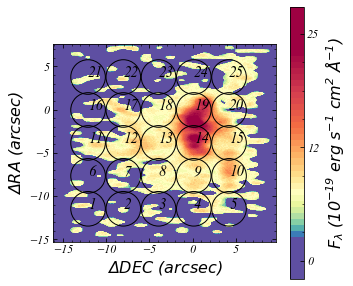

In [7]:
fig_dir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
fig1,ax=plt.subplots(1,1)
img=ax.contourf(lyx,lyy,lyimg,cmap='Spectral_r',levels=50,
            norm=colors.SymLogNorm(linthresh=1.7,linscale=1,vmax=28,vmin=3))
for i in range(25):
    circle=plt.Circle((decmap[i],ramap[i]),2,fill=False)
    ax.text(decmap[i],ramap[i],str(i+1),fontsize=15)
    ax.add_patch(circle)
ax.set_xlabel(r'$\Delta DEC \ (arcsec)$')
ax.set_ylabel(r'$\Delta RA \ (arcsec)$')
ax.set_aspect('equal', adjustable='box')
cbar=plt.colorbar(img)
cbar.locator = ticker.MaxNLocator(nbins=3)
cbar.update_ticks()
cbar.ax.set_yticklabels([0,12,25])
cbar.ax.set_ylabel(r'$\rm F_{\lambda} \ (10^{-19} \ erg \ s^{-1} \ cm^{2} \ \AA^{-1})$')
plt.rcParams['figure.figsize'] = [5, 5]
plt.savefig(fig_dir+'apertmap.png',dpi=300)
# plt.show()